In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, LSTM, concatenate, Dense, GRU, Attention, MultiHeadAttention, LayerNormalization, TimeDistributed, Flatten, Dropout
from tensorflow.keras import  callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.activations import relu
from tensorflow.keras.layers import GlobalAveragePooling1D, BatchNormalization 
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt

In [356]:
def draw(history):
    # Plot accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# 사이드레터럴레이즈 

In [ ]:
total_data_path = '/content/total_data_slr.pkl'
with open(total_data_path, 'rb') as f:
    total_data_slr = pickle.load(f)

outputvec_path = '/content/outputvec_slr.pkl'
with open(outputvec_path, 'rb') as f:
    outputvec_slr = pickle.load(f)


In [ ]:
y1=[]
y2=[]
y3=[]
y4=[]
y5=[]
for i in outputvec_slr:
    y1.append([i[0]])
    y2.append([i[1]])
    y3.append([i[2]])
    y4.append([i[3]])
    y5.append([i[4]])
y1=np.array(y1)
y2=np.array(y2)
y3=np.array(y3)
y4=np.array(y4)
y5=np.array(y5)

In [1079]:
print(y1.shape,y2.shape,y3.shape,y4.shape,y5.shape)

(541, 1) (541, 1) (541, 1) (541, 1) (541, 1)


Epoch 1/150
27/27 [==============================] - 2s 19ms/step - loss: 1.0510 - accuracy: 0.5301 - val_loss: 5.8842 - val_accuracy: 0.4862 - lr: 0.0010
Epoch 2/150
27/27 [==============================] - 0s 10ms/step - loss: 0.7654 - accuracy: 0.5880 - val_loss: 3.8789 - val_accuracy: 0.4862 - lr: 0.0010
Epoch 3/150
27/27 [==============================] - 0s 8ms/step - loss: 0.7799 - accuracy: 0.5903 - val_loss: 5.2895 - val_accuracy: 0.4862 - lr: 0.0010
Epoch 4/150
27/27 [==============================] - 0s 9ms/step - loss: 0.7437 - accuracy: 0.6042 - val_loss: 4.6001 - val_accuracy: 0.4862 - lr: 0.0010
Epoch 5/150
27/27 [==============================] - 0s 10ms/step - loss: 0.7828 - accuracy: 0.5833 - val_loss: 3.4451 - val_accuracy: 0.4862 - lr: 0.0010
Epoch 6/150
27/27 [==============================] - 0s 11ms/step - loss: 0.7627 - accuracy: 0.5880 - val_loss: 2.5638 - val_accuracy: 0.4862 - lr: 0.0010
Epoch 7/150
27/27 [==============================] - 0s 8ms/step - loss:

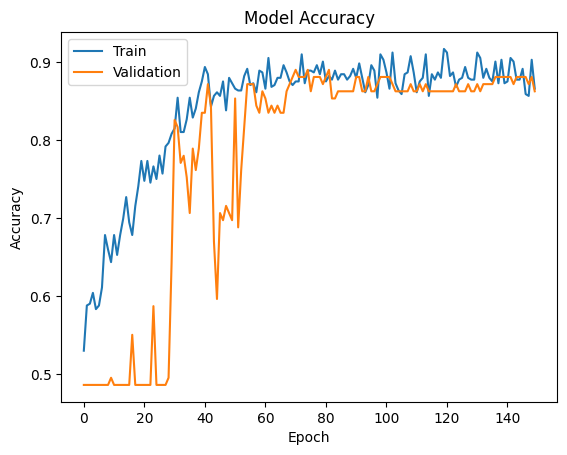

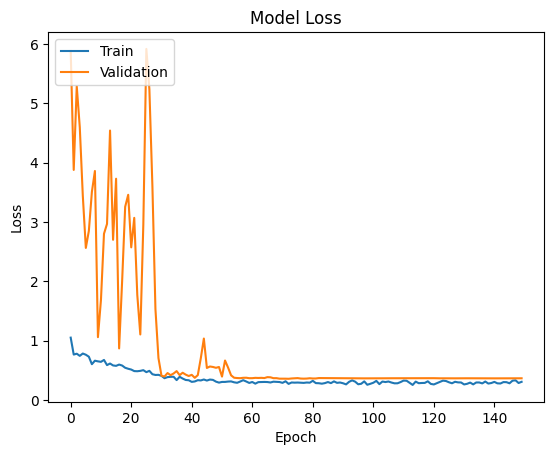

In [1078]:
#사이드레터럴레이즈 


# 입력 데이터 shape
input_shape = (16,240)
# 출력 데이터 shape
output_shape = 1
# 데이터 개수
num_samples = 541
K.clear_session()

# 모델 생성
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=input_shape)) 
model.add(tf.keras.layers.Dense(64, activation='relu'))  # Dense 레이어
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(32, activation='relu'))  # Dense 레이어
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(output_shape, activation='sigmoid'))  # 출력 레이어
callbacks_list = [
                  callbacks.ModelCheckpoint(filepath='DNN_try.h5', 
                                            monitor='val_loss', 
                                            save_best_only=True),
                  callbacks.ReduceLROnPlateau(monitor='val_loss',
                                              factor=0.1,
                                              patience=10)
                  ]
# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(total_data_slr, y1, epochs=150, batch_size=16, validation_split=0.2,callbacks=callbacks_list)

draw(history)

# 바벨스쿼드

In [1100]:
total_data_path = '/content/total_data_bs.pkl'
with open(total_data_path, 'rb') as f:
    total_data_bs = pickle.load(f)

outputvec_path = '/content/outputvec_bs.pkl'
with open(outputvec_path, 'rb') as f:
    outputvec_bs = pickle.load(f)


In [1101]:
y1=[]
y2=[]
y3=[]
y4=[]
for i in outputvec_bs:
    y1.append([i[0]])
    y2.append([i[1]])
    y3.append([i[2]])
    y4.append([i[3]])
y1=np.array(y1)
y2=np.array(y2)
y3=np.array(y3)
y4=np.array(y4)

In [1102]:
print(y1.shape,y2.shape,y3.shape,y4.shape)

(272, 1) (272, 1) (272, 1) (272, 1)


Epoch 1/100
7/7 [==============================] - 2s 56ms/step - loss: 0.9455 - accuracy: 0.5714 - val_loss: 48.1541 - val_accuracy: 0.5091 - lr: 0.0010
Epoch 2/100
7/7 [==============================] - 0s 21ms/step - loss: 0.7973 - accuracy: 0.6037 - val_loss: 4.0795 - val_accuracy: 0.5091 - lr: 0.0010
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6690 - accuracy: 0.6544 - val_loss: 4.2413 - val_accuracy: 0.4909 - lr: 0.0010
Epoch 4/100
7/7 [==============================] - 0s 15ms/step - loss: 0.7386 - accuracy: 0.6406 - val_loss: 7.5105 - val_accuracy: 0.4909 - lr: 0.0010
Epoch 5/100
7/7 [==============================] - 0s 19ms/step - loss: 0.5024 - accuracy: 0.8111 - val_loss: 9.2180 - val_accuracy: 0.4909 - lr: 0.0010
Epoch 6/100
7/7 [==============================] - 0s 16ms/step - loss: 0.5796 - accuracy: 0.7189 - val_loss: 8.4426 - val_accuracy: 0.4909 - lr: 0.0010
Epoch 7/100
7/7 [==============================] - 0s 15ms/step - loss: 0.4605 - 

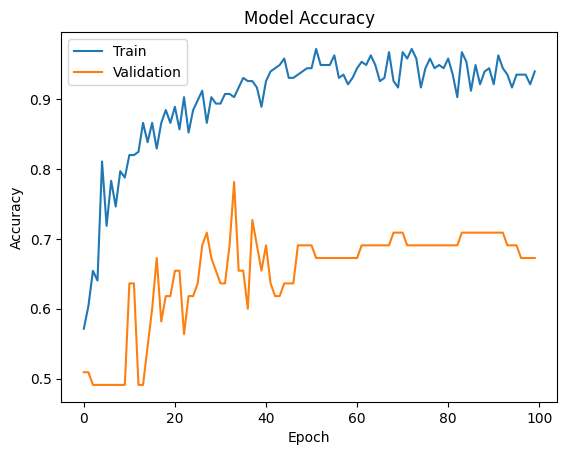

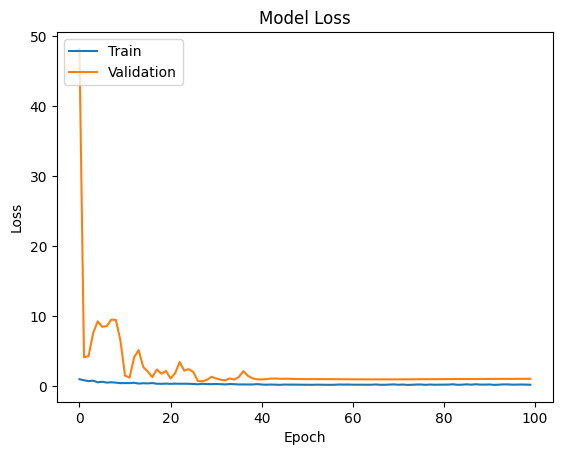

In [1107]:
#바벨 스쿼드 


# 입력 데이터 shape
input_shape = (16,240)
# 출력 데이터 shape
output_shape = 1
# 데이터 개수
num_samples = 272
K.clear_session()

# 모델 생성
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=input_shape)) 
model.add(tf.keras.layers.Dense(64, activation='relu'))  # Dense 레이어
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(32, activation='relu'))  # Dense 레이어
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(output_shape, activation='sigmoid'))  # 출력 레이어
callbacks_list = [
                  callbacks.ModelCheckpoint(filepath='DNN_try.h5', 
                                            monitor='val_loss', 
                                            save_best_only=True),
                  callbacks.ReduceLROnPlateau(monitor='val_loss',
                                              factor=0.1,
                                              patience=10)
                  ]
# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(total_data_bs, y1, epochs=100, batch_size=32, validation_split=0.2,callbacks=callbacks_list)

draw(history)

# 오버헤드프레스

In [1047]:
total_data_path = '/content/total_data_ohp.pkl'
with open(total_data_path, 'rb') as f:
    total_data_ohp = pickle.load(f)

outputvec_path = '/content/outputvec_ohp.pkl'
with open(outputvec_path, 'rb') as f:
    outputvec_ohp = pickle.load(f)

In [1048]:
y1=[]
y2=[]
y3=[]
y4=[]
for i in outputvec_ohp:
    y1.append([i[0]])
    y2.append([i[1]])
    y3.append([i[2]])
    y4.append([i[3]])
y1=np.array(y1)
y2=np.array(y2)
y3=np.array(y3)
y4=np.array(y4)
print(y1.shape,y2.shape,y3.shape,y4.shape)

(262, 1) (262, 1) (262, 1) (262, 1)


Epoch 1/100
7/7 [==============================] - 3s 55ms/step - loss: 0.9135 - accuracy: 0.5370 - val_loss: 19.2481 - val_accuracy: 0.7857 - lr: 0.0010
Epoch 2/100
7/7 [==============================] - 0s 18ms/step - loss: 0.8811 - accuracy: 0.5741 - val_loss: 13.3784 - val_accuracy: 0.7857 - lr: 0.0010
Epoch 3/100
7/7 [==============================] - 0s 18ms/step - loss: 0.7744 - accuracy: 0.6019 - val_loss: 10.3487 - val_accuracy: 0.7857 - lr: 0.0010
Epoch 4/100
7/7 [==============================] - 0s 21ms/step - loss: 0.7051 - accuracy: 0.6111 - val_loss: 7.5315 - val_accuracy: 0.7857 - lr: 0.0010
Epoch 5/100
7/7 [==============================] - 0s 22ms/step - loss: 0.8536 - accuracy: 0.5278 - val_loss: 6.2250 - val_accuracy: 0.7857 - lr: 0.0010
Epoch 6/100
7/7 [==============================] - 0s 21ms/step - loss: 0.7032 - accuracy: 0.6481 - val_loss: 5.0954 - val_accuracy: 0.7857 - lr: 0.0010
Epoch 7/100
7/7 [==============================] - 0s 21ms/step - loss: 0.7659 

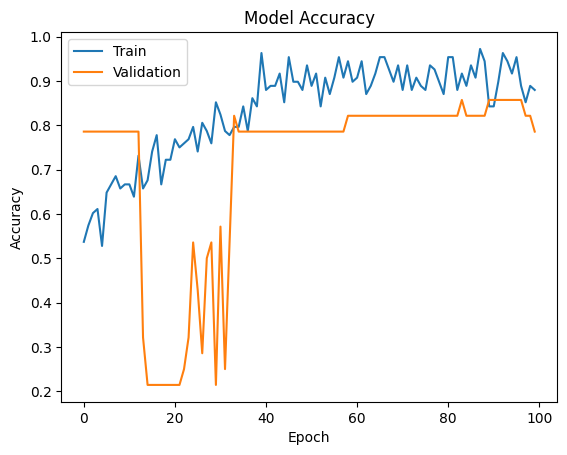

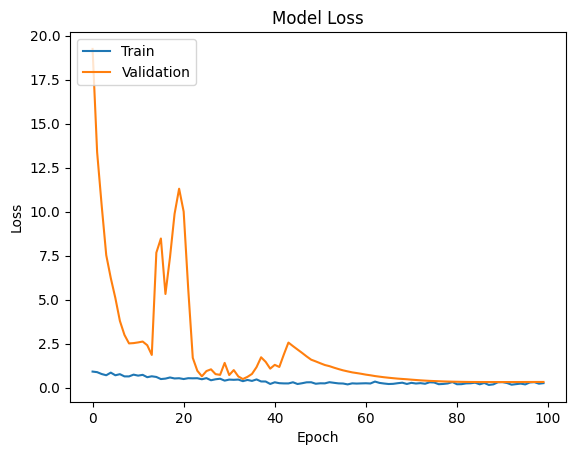

In [1053]:
#오버헤드프레스


# 입력 데이터 shape
input_shape = (16,240)
# 출력 데이터 shape
output_shape = 1
# 데이터 개수
num_samples = 262
K.clear_session()

# 모델 생성
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=input_shape)) 
model.add(tf.keras.layers.Dense(64, activation='relu'))  # Dense 레이어
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(32, activation='relu'))  # Dense 레이어
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(output_shape, activation='sigmoid'))  # 출력 레이어
callbacks_list = [
                  callbacks.ModelCheckpoint(filepath='DNN_try.h5', 
                                            monitor='val_loss', 
                                            save_best_only=True),
                  callbacks.ReduceLROnPlateau(monitor='val_loss',
                                              factor=0.1,
                                              patience=10)
                  ]
# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(total_data_ohp, y1, epochs=100, batch_size=16, validation_split=0.2,callbacks=callbacks_list)

draw(history)

# 스탠딩니업

In [1050]:
total_data_path = '/content/total_data_sku.pkl'
with open(total_data_path, 'rb') as f:
    total_data_sku = pickle.load(f)

outputvec_path = '/content/outputvec_sku.pkl'
with open(outputvec_path, 'rb') as f:
    outputvec_sku = pickle.load(f)

In [1051]:
y1=[]
y2=[]
y3=[]
y4=[]
for i in outputvec_sku:
    y1.append([i[0]])
    y2.append([i[1]])
    y3.append([i[2]])
    y4.append([i[3]])
y1=np.array(y1)
y2=np.array(y2)
y3=np.array(y3)
y4=np.array(y4)

print(y1.shape,y2.shape,y3.shape,y4.shape)

(136, 1) (136, 1) (136, 1) (136, 1)


Epoch 1/100
7/7 [==============================] - 2s 59ms/step - loss: 1.1497 - accuracy: 0.4815 - val_loss: 58.1508 - val_accuracy: 0.2143 - lr: 0.0010
Epoch 2/100
7/7 [==============================] - 0s 20ms/step - loss: 0.7599 - accuracy: 0.6944 - val_loss: 41.1170 - val_accuracy: 0.2143 - lr: 0.0010
Epoch 3/100
7/7 [==============================] - 0s 19ms/step - loss: 0.9196 - accuracy: 0.5278 - val_loss: 32.2020 - val_accuracy: 0.2143 - lr: 0.0010
Epoch 4/100
7/7 [==============================] - 0s 18ms/step - loss: 0.8698 - accuracy: 0.5926 - val_loss: 23.8068 - val_accuracy: 0.2143 - lr: 0.0010
Epoch 5/100
7/7 [==============================] - 0s 17ms/step - loss: 0.9124 - accuracy: 0.5278 - val_loss: 20.0274 - val_accuracy: 0.2143 - lr: 0.0010
Epoch 6/100
7/7 [==============================] - 0s 20ms/step - loss: 0.8152 - accuracy: 0.6204 - val_loss: 17.3965 - val_accuracy: 0.2143 - lr: 0.0010
Epoch 7/100
7/7 [==============================] - 0s 18ms/step - loss: 0.64

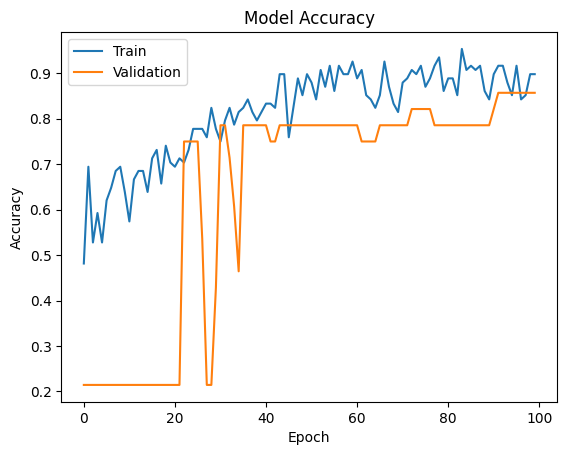

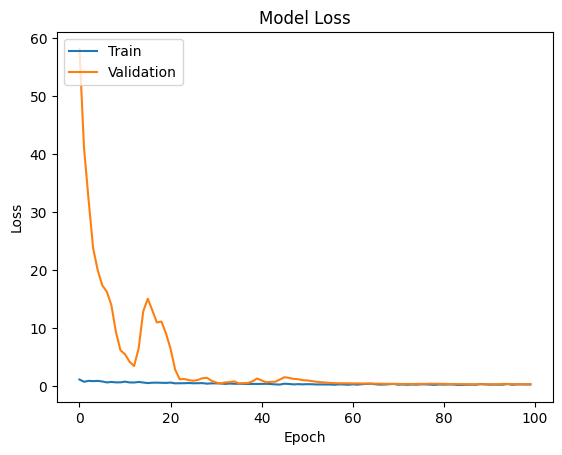

In [1054]:
#스탠딩 니업


# 입력 데이터 shape
input_shape = (16,240)
# 출력 데이터 shape
output_shape = 1
# 데이터 개수
num_samples = 136
K.clear_session()

# 모델 생성
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=input_shape)) 
model.add(tf.keras.layers.Dense(64, activation='relu'))  # Dense 레이어
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(32, activation='relu'))  # Dense 레이어
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(output_shape, activation='sigmoid'))  # 출력 레이어
callbacks_list = [
                  callbacks.ModelCheckpoint(filepath='DNN_try.h5', 
                                            monitor='val_loss', 
                                            save_best_only=True),
                  callbacks.ReduceLROnPlateau(monitor='val_loss',
                                              factor=0.1,
                                              patience=10)
                  ]
# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(total_data_sku, y1, epochs=100, batch_size=16, validation_split=0.2,callbacks=callbacks_list)
draw(history)

# 바벨런지

In [1080]:
total_data_path = '/content/total_data_bl.pkl'
with open(total_data_path, 'rb') as f:
    total_data_bl = pickle.load(f)
total_data_bl = np.reshape(total_data_bl, (544, 16, 240))

outputvec_path = '/content/outputvec_bl.pkl'
with open(outputvec_path, 'rb') as f:
    outputvec_bl = pickle.load(f)

In [ ]:
y1=[]
y2=[]
y3=[]
y4=[]
y5=[]
for i in outputvec_bl:
    y1.append([i[0]])
    y2.append([i[1]])
    y3.append([i[2]])
    y4.append([i[3]])
    y5.append([i[4]])
y1=np.array(y1)
y2=np.array(y2)
y3=np.array(y3)
y4=np.array(y4)
y5=np.array(y5)

In [1082]:
print(y1.shape,y2.shape,y3.shape,y4.shape,y5.shape)

(544, 1) (544, 1) (544, 1) (544, 1) (544, 1)


Epoch 1/100
28/28 [==============================] - 2s 19ms/step - loss: 0.8719 - accuracy: 0.5494 - val_loss: 16.4511 - val_accuracy: 0.2477 - lr: 0.0010
Epoch 2/100
28/28 [==============================] - 0s 10ms/step - loss: 0.7461 - accuracy: 0.6207 - val_loss: 3.5140 - val_accuracy: 0.2477 - lr: 0.0010
Epoch 3/100
28/28 [==============================] - 0s 10ms/step - loss: 0.7302 - accuracy: 0.6368 - val_loss: 1.4642 - val_accuracy: 0.2477 - lr: 0.0010
Epoch 4/100
28/28 [==============================] - 0s 10ms/step - loss: 0.6706 - accuracy: 0.6391 - val_loss: 1.3142 - val_accuracy: 0.2477 - lr: 0.0010
Epoch 5/100
28/28 [==============================] - 0s 9ms/step - loss: 0.6407 - accuracy: 0.6805 - val_loss: 0.6202 - val_accuracy: 0.7523 - lr: 0.0010
Epoch 6/100
28/28 [==============================] - 0s 9ms/step - loss: 0.5922 - accuracy: 0.7034 - val_loss: 0.5757 - val_accuracy: 0.7523 - lr: 0.0010
Epoch 7/100
28/28 [==============================] - 0s 9ms/step - loss

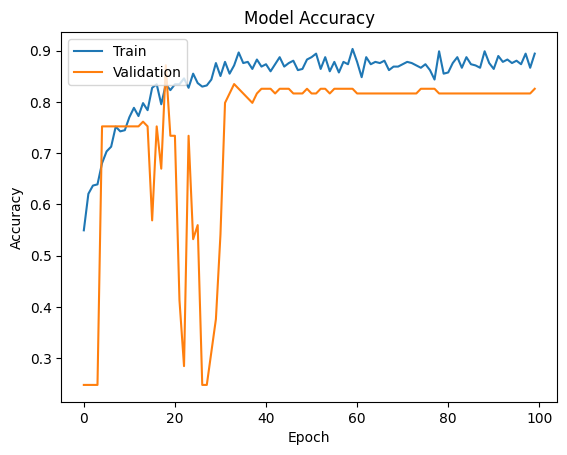

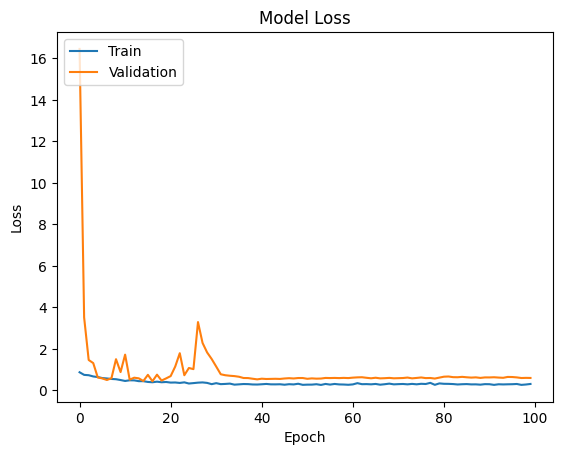

In [1060]:
#바벨 런지 


# 입력 데이터 shape
input_shape = (16,240)
# 출력 데이터 shape
output_shape = 1
# 데이터 개수
num_samples = 544
K.clear_session()

# 모델 생성
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=input_shape)) 
model.add(tf.keras.layers.Dense(64, activation='relu'))  # Dense 레이어
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(32, activation='relu'))  # Dense 레이어
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(output_shape, activation='sigmoid'))  # 출력 레이어
callbacks_list = [
                  callbacks.ModelCheckpoint(filepath='DNN_try.h5', 
                                            monitor='val_loss', 
                                            save_best_only=True),
                  callbacks.ReduceLROnPlateau(monitor='val_loss',
                                              factor=0.1,
                                              patience=10)
                  ]
# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(total_data_bl, y1, epochs=100, batch_size=16, validation_split=0.2,callbacks=callbacks_list)

draw(history)


# 바벨데드리프트

In [1083]:
total_data_path = '/content/total_data_bd.pkl'
with open(total_data_path, 'rb') as f:
    total_data_bd = pickle.load(f)

outputvec_path = '/content/outputvec_bd.pkl'
with open(outputvec_path, 'rb') as f:
    outputvec_bd = pickle.load(f)

In [1084]:
y1=[]
y2=[]
y3=[]
y4=[]
y5=[]
for i in outputvec_bd:
    y1.append([i[0]])
    y2.append([i[1]])
    y3.append([i[2]])
    y4.append([i[3]])
    y5.append([i[4]])
y1=np.array(y1)
y2=np.array(y2)
y3=np.array(y3)
y4=np.array(y4)
y5=np.array(y5)


In [1085]:
print(y1.shape,y2.shape,y3.shape,y4.shape,y5.shape)

(480, 1) (480, 1) (480, 1) (480, 1) (480, 1)


Epoch 1/100
24/24 [==============================] - 2s 19ms/step - loss: 0.9260 - accuracy: 0.5469 - val_loss: 69.2566 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/100
24/24 [==============================] - 0s 10ms/step - loss: 0.7614 - accuracy: 0.6380 - val_loss: 32.5776 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/100
24/24 [==============================] - 0s 10ms/step - loss: 0.6999 - accuracy: 0.6771 - val_loss: 25.3684 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/100
24/24 [==============================] - 0s 16ms/step - loss: 0.6802 - accuracy: 0.6745 - val_loss: 16.9639 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/100
24/24 [==============================] - 0s 13ms/step - loss: 0.5940 - accuracy: 0.7031 - val_loss: 7.2258 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 6/100
24/24 [==============================] - 0s 14ms/step - loss: 0.6323 - accuracy: 0.6953 - val_loss: 3.4485 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 7/100
24/24 [==============================] - 0s 15ms/step 

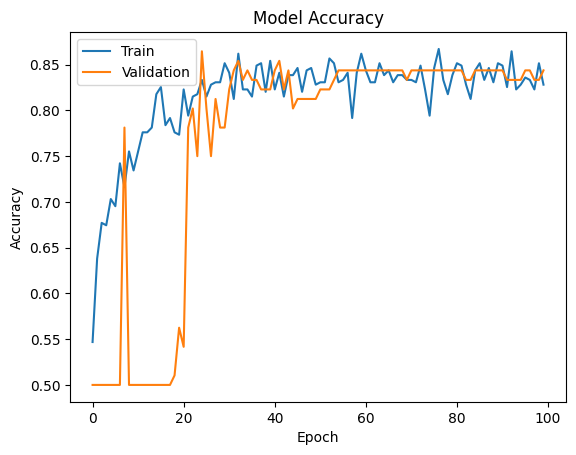

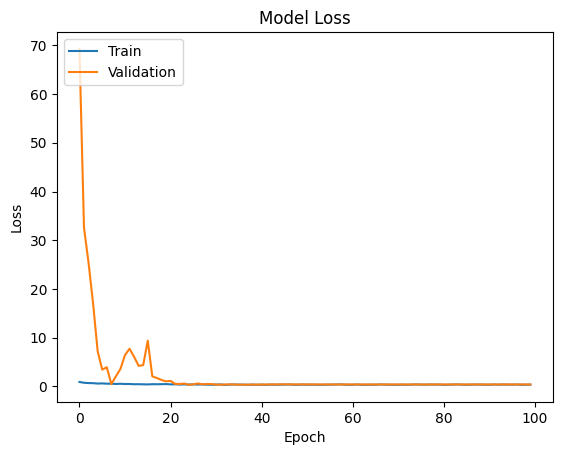

In [1064]:
#바벨 데드리프트


# 입력 데이터 shape
input_shape = (16,240)
# 출력 데이터 shape
output_shape = 1
# 데이터 개수
num_samples = 480
K.clear_session()

# 모델 생성
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=input_shape)) 
model.add(tf.keras.layers.Dense(64, activation='relu'))  # Dense 레이어
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(32, activation='relu'))  # Dense 레이어
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(output_shape, activation='sigmoid'))  # 출력 레이어
callbacks_list = [
                  callbacks.ModelCheckpoint(filepath='DNN_try.h5', 
                                            monitor='val_loss', 
                                            save_best_only=True),
                  callbacks.ReduceLROnPlateau(monitor='val_loss',
                                              factor=0.1,
                                              patience=10)
                  ]
# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(total_data_bd, y1, epochs=100, batch_size=16, validation_split=0.2,callbacks=callbacks_list)

draw(history)


# 바벨로우

In [1095]:
total_data_path = '/content/total_data_blow.pkl'
with open(total_data_path, 'rb') as f:
    total_data_blow = pickle.load(f)

outputvec_path = '/content/outputvec_blow.pkl'
with open(outputvec_path, 'rb') as f:
    outputvec_blow = pickle.load(f)

In [1096]:
y1=[]
y2=[]
y3=[]
y4=[]
y5=[]
for i in outputvec_blow:
    y1.append([i[0]])
    y2.append([i[1]])
    y3.append([i[2]])
    y4.append([i[3]])
    y5.append([i[4]])
y1=np.array(y1)
y2=np.array(y2)
y3=np.array(y3)
y4=np.array(y4)
y5=np.array(y5)

In [1097]:
print(y1.shape,y2.shape,y3.shape,y4.shape,y5.shape)

(134, 1) (134, 1) (134, 1) (134, 1) (134, 1)


Epoch 1/100
7/7 [==============================] - 2s 57ms/step - loss: 0.8631 - accuracy: 0.5421 - val_loss: 53.1385 - val_accuracy: 0.1111 - lr: 0.0010
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss: 1.0198 - accuracy: 0.5140 - val_loss: 67.0913 - val_accuracy: 0.1111 - lr: 0.0010
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 0.9407 - accuracy: 0.5701 - val_loss: 57.6790 - val_accuracy: 0.1111 - lr: 0.0010
Epoch 4/100
7/7 [==============================] - 0s 20ms/step - loss: 0.9161 - accuracy: 0.4299 - val_loss: 47.8916 - val_accuracy: 0.1111 - lr: 0.0010
Epoch 5/100
7/7 [==============================] - 0s 18ms/step - loss: 0.9806 - accuracy: 0.5327 - val_loss: 39.6865 - val_accuracy: 0.1111 - lr: 0.0010
Epoch 6/100
7/7 [==============================] - 0s 18ms/step - loss: 0.9094 - accuracy: 0.5234 - val_loss: 28.3801 - val_accuracy: 0.1111 - lr: 0.0010
Epoch 7/100
7/7 [==============================] - 0s 17ms/step - loss: 0.74

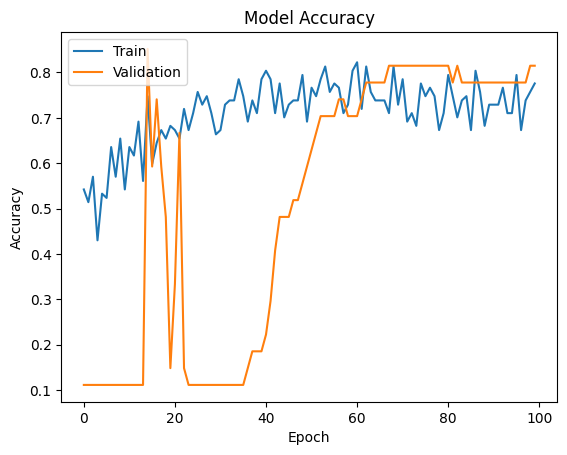

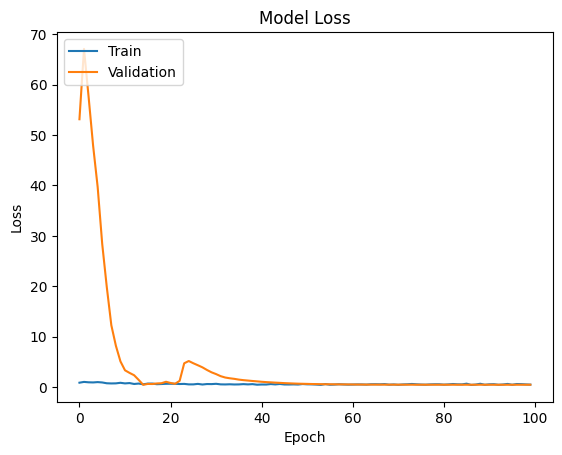

In [1098]:
#바벨 로우 


# 입력 데이터 shape
input_shape = (16,240)
# 출력 데이터 shape
output_shape = 1
# 데이터 개수
num_samples = 134
K.clear_session()

# 모델 생성
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=input_shape)) 
model.add(tf.keras.layers.Dense(64, activation='relu'))  # Dense 레이어
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(32, activation='relu'))  # Dense 레이어
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(output_shape, activation='sigmoid'))  # 출력 레이어
callbacks_list = [
                  callbacks.ModelCheckpoint(filepath='DNN_try.h5', 
                                            monitor='val_loss', 
                                            save_best_only=True),
                  callbacks.ReduceLROnPlateau(monitor='val_loss',
                                              factor=0.1,
                                              patience=10)
                  ]
# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(total_data_blow, y1, epochs=100, batch_size=16, validation_split=0.2,callbacks=callbacks_list)

draw(history)



# 덤벨컬

In [1090]:
total_data_path = '/content/total_data_dc.pkl'
with open(total_data_path, 'rb') as f:
    total_data_dc = pickle.load(f)

outputvec_path = '/content/outputvec_dc.pkl'
with open(outputvec_path, 'rb') as f:
    outputvec_dc = pickle.load(f)

In [1091]:
y1=[]
y2=[]
y3=[]
y4=[]
y5=[]
for i in outputvec_dc:
    y1.append([i[0]])
    y2.append([i[1]])
    y3.append([i[2]])
    y4.append([i[3]])
    y5.append([i[4]])
y1=np.array(y1)
y2=np.array(y2)
y3=np.array(y3)
y4=np.array(y4)
y5=np.array(y5)

In [1092]:
print(y1.shape,y2.shape,y3.shape,y4.shape,y5.shape)

(544, 1) (544, 1) (544, 1) (544, 1) (544, 1)


Epoch 1/100
28/28 [==============================] - 3s 28ms/step - loss: 0.7928 - accuracy: 0.6046 - val_loss: 29.8876 - val_accuracy: 0.5413 - lr: 0.0010
Epoch 2/100
28/28 [==============================] - 0s 10ms/step - loss: 0.7172 - accuracy: 0.6874 - val_loss: 10.4835 - val_accuracy: 0.5413 - lr: 0.0010
Epoch 3/100
28/28 [==============================] - 0s 10ms/step - loss: 0.5388 - accuracy: 0.7333 - val_loss: 8.0076 - val_accuracy: 0.5413 - lr: 0.0010
Epoch 4/100
28/28 [==============================] - 0s 9ms/step - loss: 0.5612 - accuracy: 0.7379 - val_loss: 1.5865 - val_accuracy: 0.5046 - lr: 0.0010
Epoch 5/100
28/28 [==============================] - 0s 8ms/step - loss: 0.4839 - accuracy: 0.7724 - val_loss: 3.0983 - val_accuracy: 0.5413 - lr: 0.0010
Epoch 6/100
28/28 [==============================] - 0s 10ms/step - loss: 0.4223 - accuracy: 0.8069 - val_loss: 1.9009 - val_accuracy: 0.5413 - lr: 0.0010
Epoch 7/100
28/28 [==============================] - 0s 10ms/step - lo

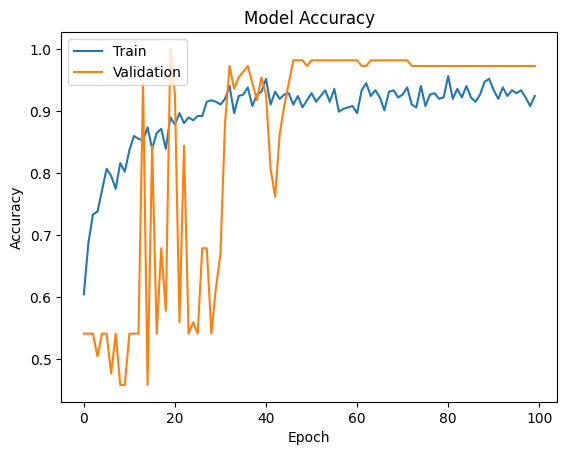

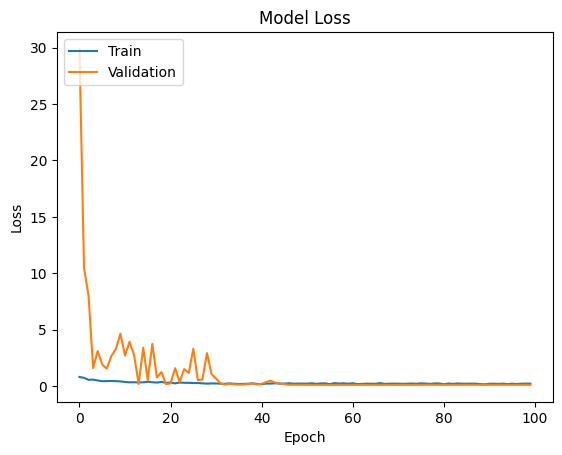

In [1073]:
#덤벨 컬 


# 입력 데이터 shape
input_shape = (16,240)
# 출력 데이터 shape
output_shape = 1
# 데이터 개수
num_samples = 544
K.clear_session()

# 모델 생성
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=input_shape)) 
model.add(tf.keras.layers.Dense(64, activation='relu'))  # Dense 레이어
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(32, activation='relu'))  # Dense 레이어
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(output_shape, activation='sigmoid'))  # 출력 레이어
callbacks_list = [
                  callbacks.ModelCheckpoint(filepath='DNN_try.h5', 
                                            monitor='val_loss', 
                                            save_best_only=True),
                  callbacks.ReduceLROnPlateau(monitor='val_loss',
                                              factor=0.1,
                                              patience=10)
                  ]
# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(total_data_dc, y1, epochs=100, batch_size=16, validation_split=0.2,callbacks=callbacks_list)

draw(history)
